In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [17]:
alphaList = "-0.20 -0.15 -0.10 -0.05 +0.00 +0.05 +0.10 +0.15 +0.20".split()
alphaListNum = [float(alpha) for alpha in alphaList]

In [15]:
# read SCF
scf = []
target = 0
check = False
for alpha in alphaList:
    if alpha == "+0.00":
        scf.append(8.439)
        continue
    filename = "OUTCAR.V={}".format(alpha)
    with open(filename, 'r') as f:
        lines = f.readlines()
        length = len(lines)
        # 找到轨道电子数的位置
        for i in range(length):
            if "total charge" in lines[i]:
                target = i
                for j in range(target, target+5):
                    if "# of ion" in lines[j]:
                        check = True
                        break
        if check:
            for i in range(target, target+10):
                line = lines[i].split()
                if len(line) == 0:
                    continue
                if line[0] == "1":
                    scf.append(float(line[3]))
                    break

# read NSCF
nscf = []
target = 0
check = False
for alpha in alphaList:
    if alpha == "+0.00":
        nscf.append(8.439)
        continue
    filename = "OUTCAR.V={}.ICHARG=11".format(alpha)
    with open(filename, 'r') as f:
        lines = f.readlines()
        length = len(lines)
        # 找到轨道电子数的位置
        for i in range(length):
            if "total charge" in lines[i]:
                target = i
                for j in range(target, target+5):
                    if "# of ion" in lines[j]:
                        check = True
                        break
        if check:
            for i in range(target, target+10):
                line = lines[i].split()
                if len(line) == 0:
                    continue
                if line[0] == "1":
                    nscf.append(float(line[3]))
                    break

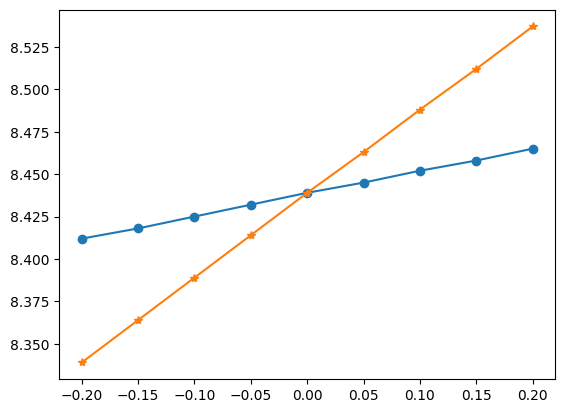

In [18]:
plt.plot(alphaListNum,scf, 'o-')
plt.plot(alphaListNum,nscf, '*-')
plt.show()

In [22]:
# 对两条直线进行拟合
# 1. 拟合SCF
x = np.array(alphaListNum)
y = np.array(scf)
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1) 
print("SCF: y=%.6fx+(%.6f)"%(z1[0],z1[1]))
# 2. 拟合NSCF
x = np.array(alphaListNum)
y = np.array(nscf)
z2 = np.polyfit(x, y, 1)
p2 = np.poly1d(z2)
print("NSCF: y=%.6fx+(%.6f)"%(z2[0],z2[1]))

SCF: y=0.133000x+(8.438444)
NSCF: y=0.494333x+(8.438333)


In [ ]:
# 计算U值
